In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import pickle

In [2]:
df = pd.read_csv('/content/Rainfall.csv')

In [3]:
df

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [4]:
df = df.drop(columns=['day'])

In [5]:
df

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pressure                366 non-null    float64
 1   maxtemp                 366 non-null    float64
 2   temparature             366 non-null    float64
 3   mintemp                 366 non-null    float64
 4   dewpoint                366 non-null    float64
 5   humidity                366 non-null    int64  
 6   cloud                   366 non-null    int64  
 7   rainfall                366 non-null    object 
 8   sunshine                366 non-null    float64
 9            winddirection  365 non-null    float64
 10  windspeed               365 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 31.6+ KB


In [7]:
df.columns = df.columns.str.strip()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       366 non-null    float64
 1   maxtemp        366 non-null    float64
 2   temparature    366 non-null    float64
 3   mintemp        366 non-null    float64
 4   dewpoint       366 non-null    float64
 5   humidity       366 non-null    int64  
 6   cloud          366 non-null    int64  
 7   rainfall       366 non-null    object 
 8   sunshine       366 non-null    float64
 9   winddirection  365 non-null    float64
 10  windspeed      365 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 31.6+ KB


In [9]:
df.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,1


In [10]:
df['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [11]:
df['winddirection']= df['winddirection'].fillna(df['winddirection'].mode()[0])
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].median())

In [12]:
df['winddirection'].unique()


array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
       160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [13]:
df['windspeed'].isnull().sum()

np.int64(0)

In [14]:
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [15]:
sns.set(style='whitegrid')

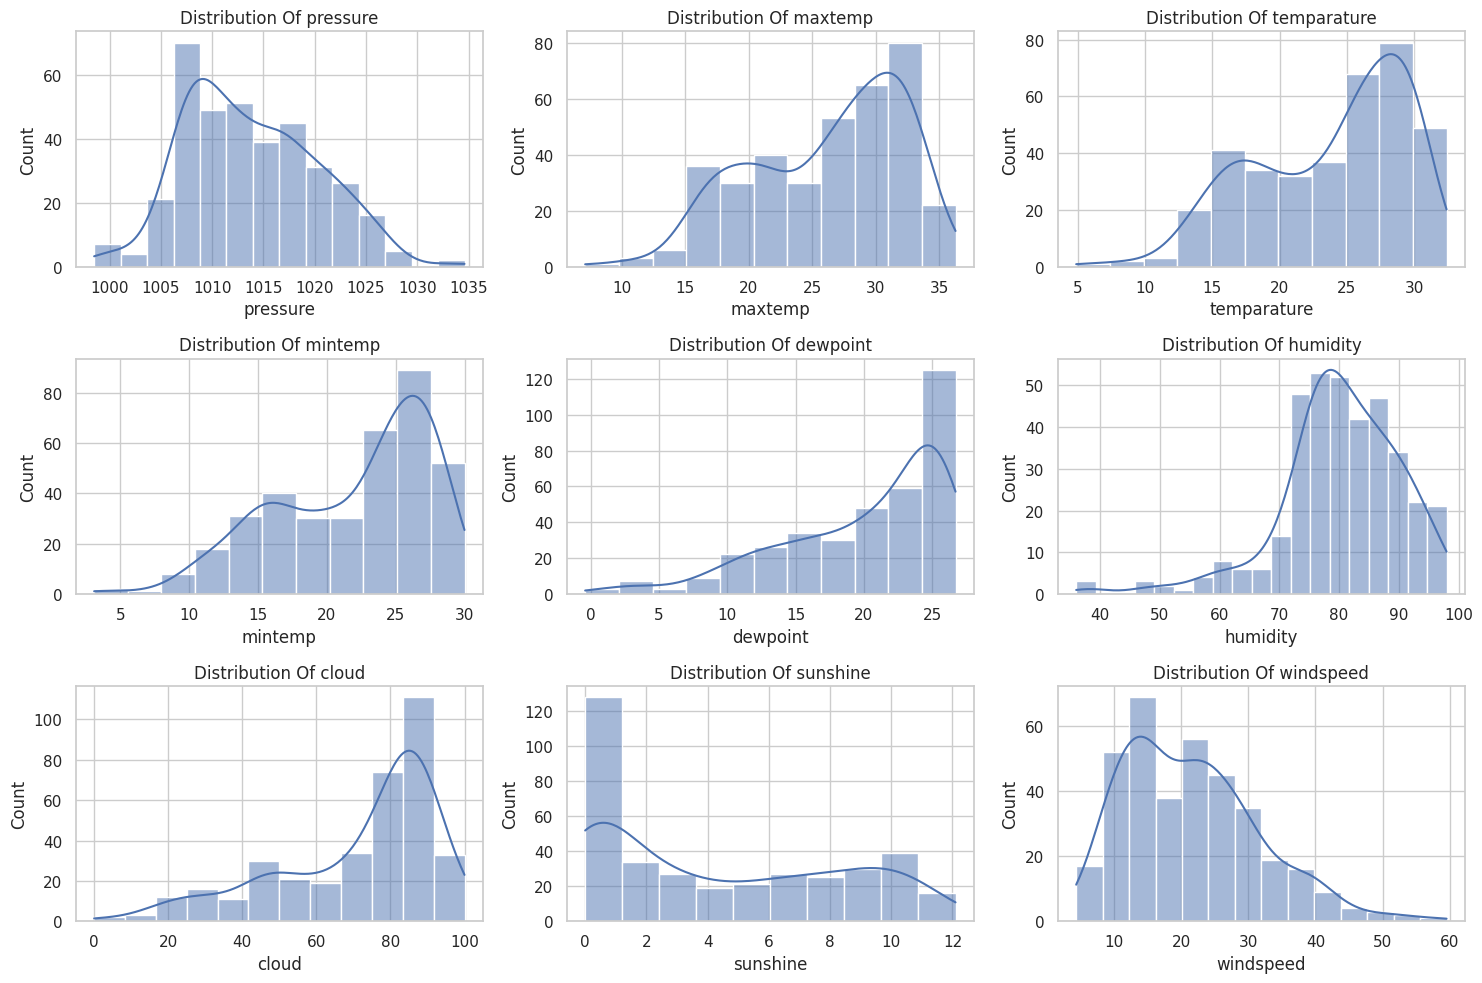

In [16]:
plt.figure(figsize=(15,10))

for i, columns in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'],1):
  plt.subplot(3,3,i)
  sns.histplot(df[columns], kde=True)
  plt.title(f"Distribution Of {columns}")

plt.tight_layout()
plt.show()

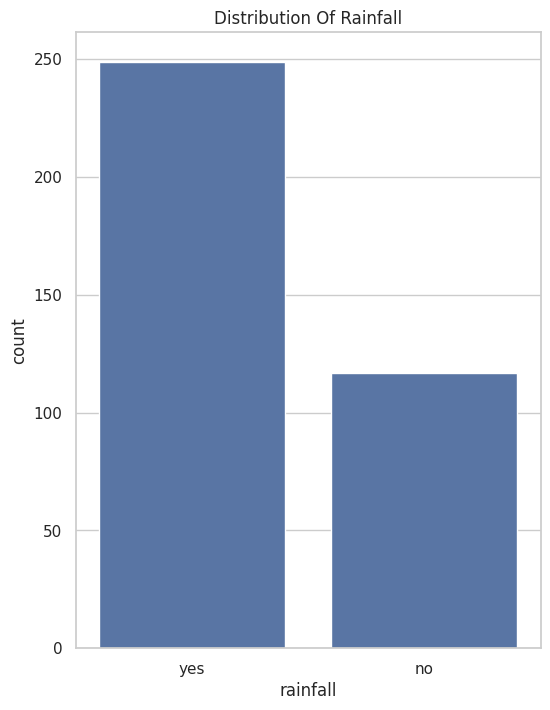

In [17]:
plt.figure(figsize=(6,8))
sns.countplot(x='rainfall',data=df)
plt.title("Distribution Of Rainfall")
plt.show()

In [18]:
df['rainfall'] = df['rainfall'].map({"yes": 1 , "no": 0})

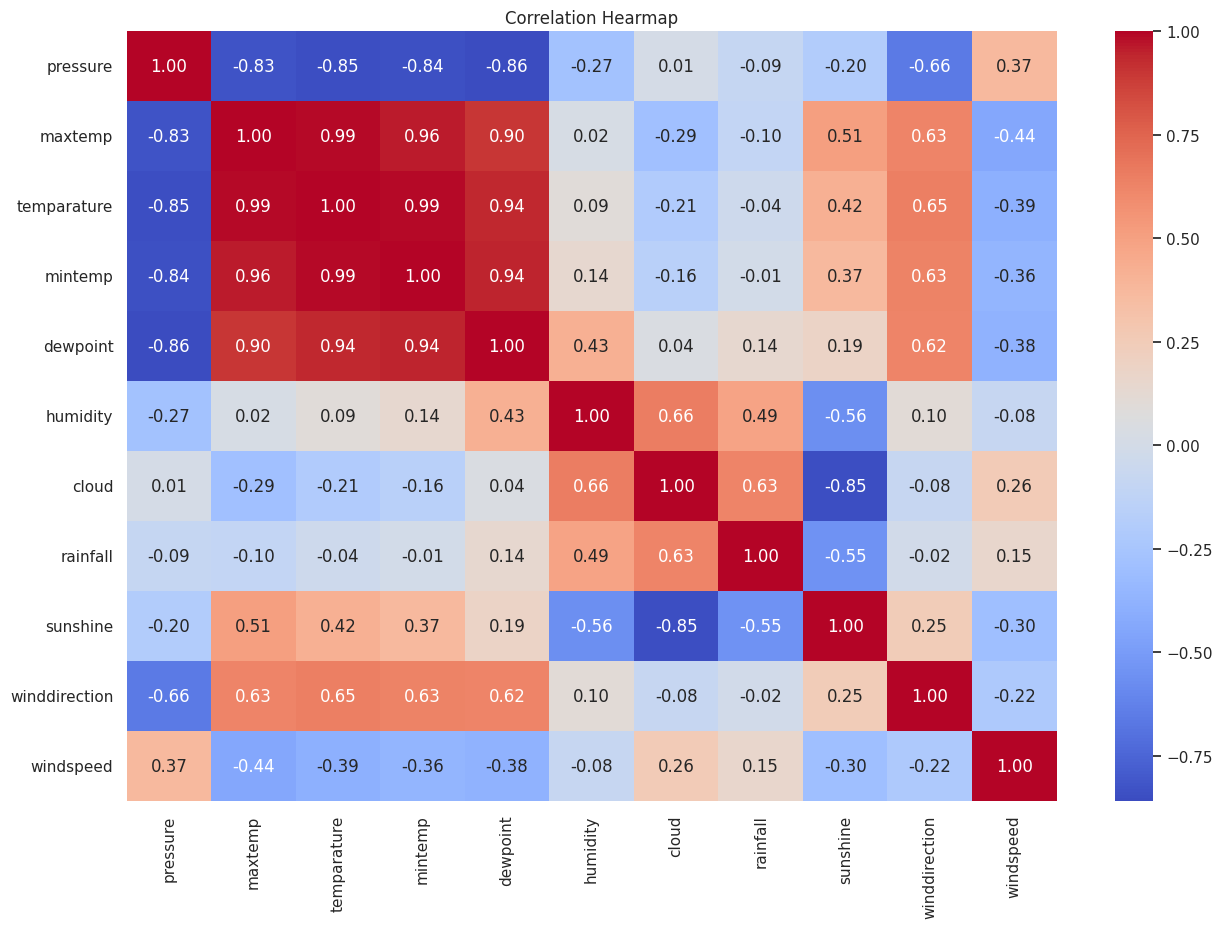

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Hearmap")
plt.show()

In [20]:
#dropping highly co-related columns
df = df.drop(columns=['maxtemp','mintemp','temparature'])

In [21]:
df['rainfall'].value_counts()

,count
rainfall,
1,249
0,117


In [22]:
df_majority = df[df['rainfall'] == 1]
df_minority = df[df['rainfall'] == 0]

In [23]:
#downsapling the majority and minority
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=2)

In [24]:
df_downsample = pd.concat([df_majority_downsampled, df_minority])

In [25]:
df_downsample.shape

(234, 8)

In [26]:
df_downsample

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
269,1006.7,26.3,87,71,1,4.7,90.0,14.0
124,1011.4,23.4,87,82,1,2.7,40.0,9.2
235,1000.0,24.2,69,30,1,7.6,220.0,11.7
326,1017.1,21.3,78,65,1,8.3,80.0,29.2
130,1008.1,24.3,87,84,1,0.3,220.0,12.0
...,...,...,...,...,...,...,...,...
351,1025.9,-0.4,39,25,0,9.1,20.0,35.6
352,1026.4,3.1,48,11,0,9.5,40.0,25.2
353,1025.4,8.7,62,71,0,2.1,30.0,29.0
360,1020.6,13.3,74,87,0,0.6,30.0,21.6


In [27]:
#shuffling the data
df_downsample = df_downsample.sample(frac=1, random_state=2).reset_index(drop=True)

In [28]:
df_downsample

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1008.8,24.3,86,87,1,0.7,20.0,9.8
1,1009.9,25.3,83,84,0,2.9,190.0,15.5
2,1017.7,15.3,95,100,1,0.0,50.0,26.2
3,1022.5,4.3,49,11,0,9.3,10.0,48.0
4,1006.9,24.2,94,88,1,0.1,40.0,22.3
...,...,...,...,...,...,...,...,...
229,1005.0,26.1,87,82,1,2.2,160.0,12.6
230,1021.3,16.2,82,87,1,1.6,50.0,22.5
231,1006.2,24.8,84,87,1,3.1,230.0,11.0
232,1018.9,18.8,90,88,1,1.0,50.0,16.9


In [29]:
X = df_downsample.drop(columns=['rainfall'])
Y = df_downsample['rainfall']

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [31]:
model_rf = RandomForestClassifier(random_state=2)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [32]:
#hyper parameter tuning with gridsearchCV
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [33]:
best_rf_model = grid_search_rf.best_estimator_
grid_search_rf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [34]:
#model evaluation
cv_score = cross_val_score(best_rf_model, X_train, Y_train, cv=5)
print(cv_score)
print(np.mean(cv_score))

[0.71052632 0.89473684 0.89189189 0.81081081 0.83783784]
0.8291607396870555


In [35]:
y_pred = best_rf_model.predict(X_test)

print("accuracy", accuracy_score(Y_test, y_pred))
print("confusion matrix\n", confusion_matrix(Y_test, y_pred))
print("classification report\n", classification_report(Y_test, y_pred))

accuracy 0.723404255319149
confusion matrix
 [[17  7]
 [ 6 17]]
classification report
               precision    recall  f1-score   support

           0       0.74      0.71      0.72        24
           1       0.71      0.74      0.72        23

    accuracy                           0.72        47
   macro avg       0.72      0.72      0.72        47
weighted avg       0.72      0.72      0.72        47



In [37]:
#testing with unknown data
input_df= [1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7]
input_df = np.array(input_df)


prediction = best_rf_model.predict(input_df)
print("Prediction Result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1015.9   19.9   95.    81.     0.    40.    13.7].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#saving model name and features to a pickle file
model_data = {"model": best_rf_model, "scaler": sclaer, "features": list(X.columns)}
with open("rainfall_prediction_model.pkl", "wb") as file:
  pickle.dump(model_data, file)